<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [3]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [4]:
penguim = sns.load_dataset('penguins')

In [5]:
penguim.head(10)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       3625.0  Female  
7       4675.0    Male  
8       3475.0     NaN  
9       4250.0     NaN

### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

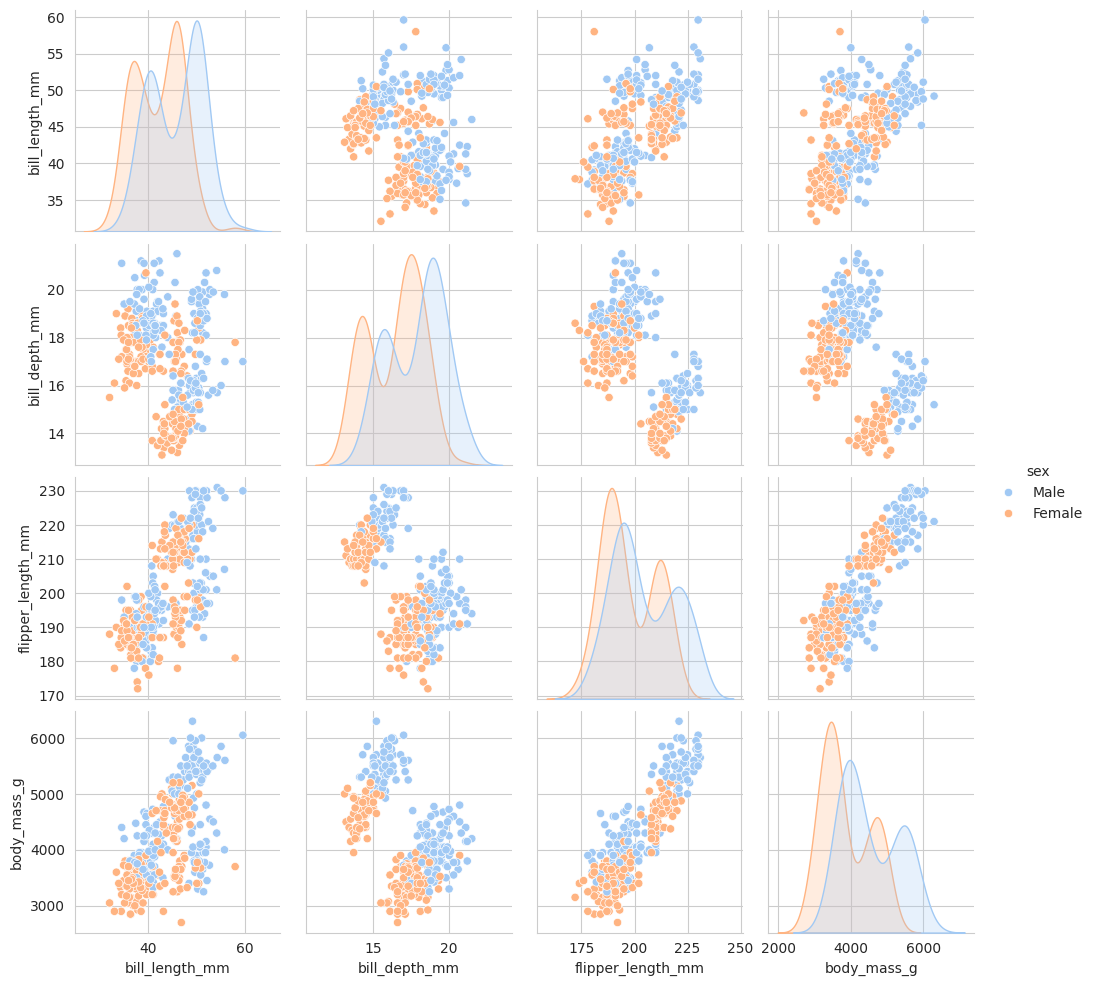

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

**Comentário:** ?

- Machos tendem a ter maior peso corporal (body_mass_g) e comprimento de nadadeira (flipper_length_mm), o que é consistente com as diferenças fisiológicas que existem entre os sexos na maioria das espécies.
- Fêmeas, por outro lado, podem ter um comprimento de bico ligeiramente menor, o que é esperado em algumas espécies de pinguins.

 - Atributos por espécie:

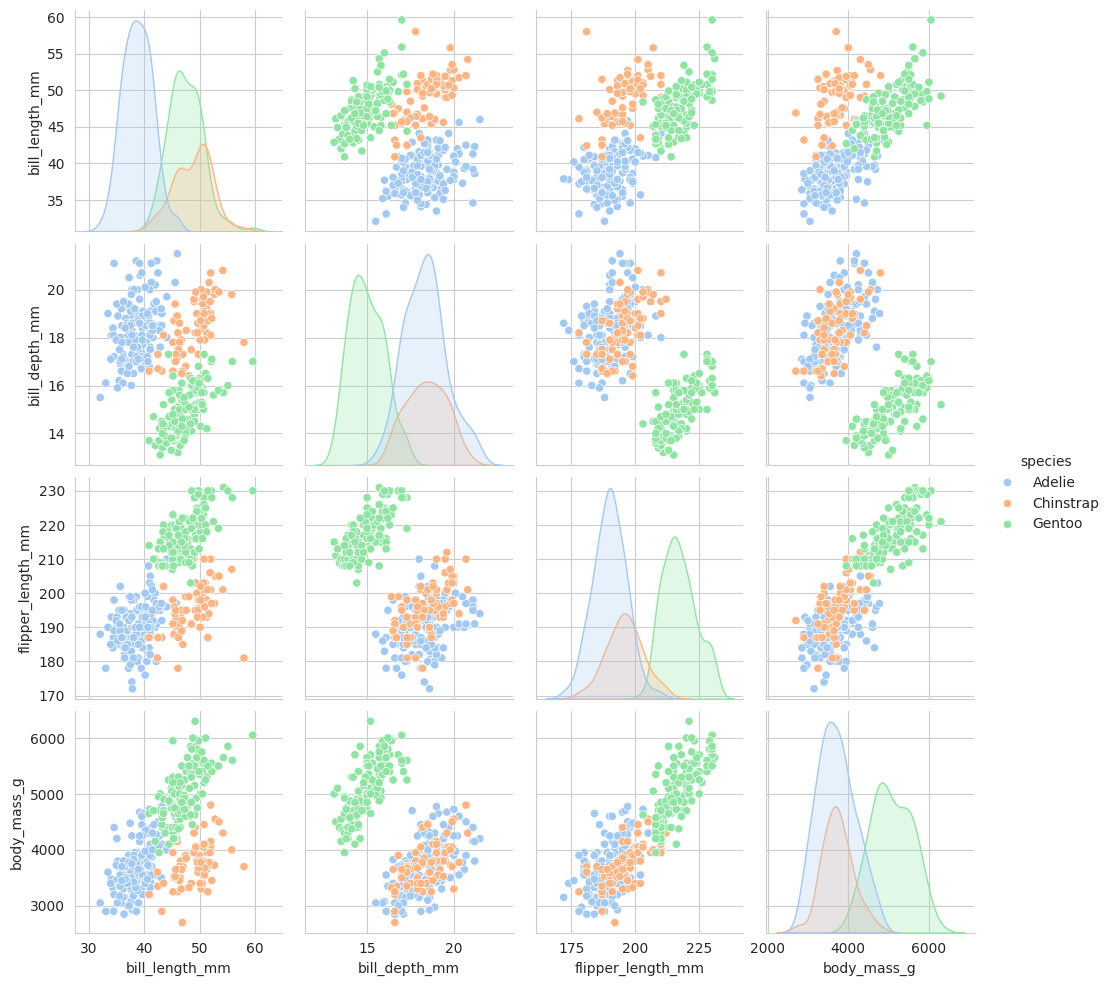

In [7]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

**Comentário:** ?

- Espécie Adelie: Tende a ter as menores medidas em todas as variáveis, com comprimentos de bico, profundidade de bico, comprimento de nadadeira e peso corporal mais baixos em comparação com as outras espécies.
- Espécie Chinstrap: Tem características intermediárias, com medidas maiores do que a Adelie, mas menores do que a Gentoo.
- Espécie Gentoo: Destaca-se por ter os maiores valores nas variáveis, refletindo seu maior tamanho em comparação com as outras duas espécies.

 - Atributos por ilha:

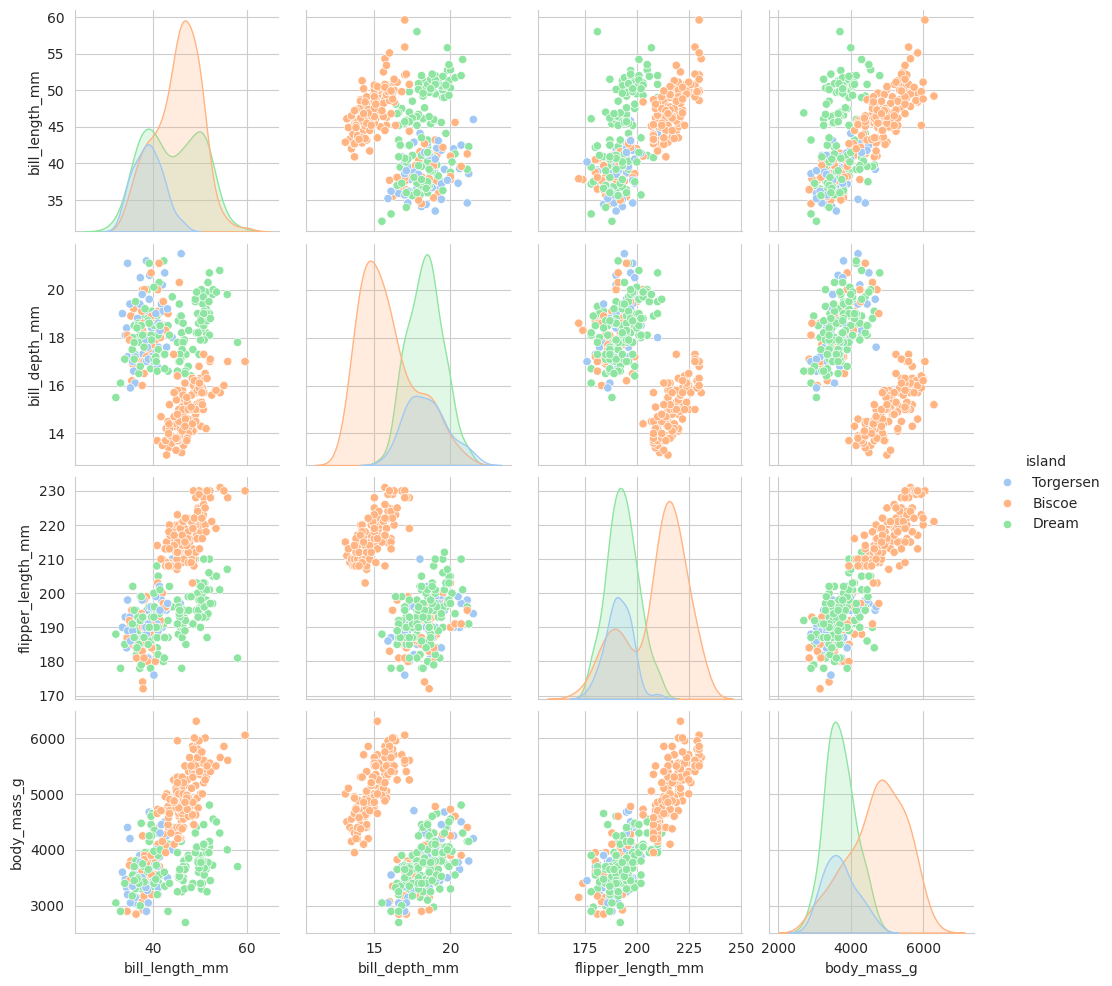

In [8]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

**Comentário:** ?

- Ilha Torgersen: Os pinguins dessa ilha tendem a ser menores, com os menores comprimentos de bico, profundidades de bico, comprimentos de nadadeiras e peso corporal. As variáveis são mais concentradas e há menos variação.
- Ilha Biscoe: Apresenta pinguins de tamanho intermediário, com uma maior dispersão nas variáveis. Em comparação com Torgersen, os pinguins dessa ilha tendem a ser um pouco mais pesados e com nadadeiras mais longas.
- Ilha Dream: A ilha Dream apresenta pinguins maiores em todas as variáveis, com maior comprimento de bico, profundidade de bico, comprimento de nadadeiras e peso corporal. A dispersão das variáveis também é mais pronunciada.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [9]:
# resposta da questão 2.1
penguim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
penguim.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

In [11]:
penguim = penguim.dropna(subset=['sex'])

In [12]:
penguim.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

In [13]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### **2.2. Variáveis numéricas**

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [14]:
# resposta da questão 2.2

In [15]:
media_bill_length_mm = penguim['bill_length_mm'].mean()
desvio_padrao_bill_length_mm = penguim['bill_length_mm'].std()

penguim['bill_length_mm_std'] = (penguim['bill_length_mm'].apply(lambda x:(x - media_bill_length_mm) / desvio_padrao_bill_length_mm))

In [16]:
media_bill_depth_mm = penguim['bill_depth_mm'].mean()
desvio_padrao_bill_depth_mm = penguim['bill_depth_mm'].std()

penguim['bill_depth_mm_std'] = (penguim['bill_depth_mm'].apply(lambda x:(x - media_bill_depth_mm) / desvio_padrao_bill_depth_mm))

In [17]:
media_flipper_length_mm = penguim['flipper_length_mm'].mean()
desvio_padrao_flipper_length_mm = penguim['flipper_length_mm'].std()

penguim['flipper_length_mm_std'] = (penguim['flipper_length_mm'].apply(lambda x:(x - media_flipper_length_mm) / desvio_padrao_flipper_length_mm))

In [18]:
# Variável resposta

media_body_mass_g = penguim['body_mass_g'].mean()
desvio_padrao_body_mass_g = penguim['body_mass_g'].std()

penguim['body_mass_g_std'] = (penguim['body_mass_g'].apply(lambda x:(x - media_body_mass_g) / desvio_padrao_body_mass_g))

In [19]:
penguim.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  bill_length_mm_std  bill_depth_mm_std  \
0       3750.0    Male           -0.894695           0.779559   
1       3800.0  Female           -0.821552           0.119404   
2       3250.0  Female           -0.675264           0.424091   
4       3450.0  Female           -1.333559           1.084246   
5       3650.0    Male           -0.858123           1.744400   

   flipper_length_mm_std  body_mass_g_std  
0              -1.424608        -0.567621  
1              -1.067867        -0.505525  
2              -0.425733        -1.188572  
4              -0.568429        -0.940192  
5              -0.782474        -0.691811

### **2.3. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [20]:
# resposta da questão 2.3

In [21]:
penguim['sex_m_nom'] = penguim['sex'].apply(lambda x: 1 if x == 'Male' else 0)
penguim['sex_f_nom'] = penguim['sex'].apply(lambda x: 1 if x == 'Female' else 0)

In [22]:
penguim['island_t_nom'] = penguim['island'].apply(lambda x: 1 if x == 'Torgersen' else 0)
penguim['island_b_nom'] = penguim['island'].apply(lambda x: 1 if x == 'Biscoe' else 0)
penguim['island_d_nom'] = penguim['island'].apply(lambda x: 1 if x == 'Dream' else 0)

In [23]:
penguim['species_a_nom'] = penguim['species'].apply(lambda x: 1 if x == 'Adelie' else 0)
penguim['species_c_nom'] = penguim['species'].apply(lambda x: 1 if x == 'Chinstrap' else 0)
penguim['species_g_nom'] = penguim['species'].apply(lambda x: 1 if x == 'Gentoo' else 0)

In [24]:
penguim.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  bill_length_mm_std  bill_depth_mm_std  \
0       3750.0    Male           -0.894695           0.779559   
1       3800.0  Female           -0.821552           0.119404   
2       3250.0  Female           -0.675264           0.424091   
4       3450.0  Female           -1.333559           1.084246   
5       3650.0    Male           -0.858123           1.744400   

   flipper_length_mm_std  body_mass_g_std  sex_m_nom  sex_f_nom  island_t_nom  \
0              -1.424608        -0.567621          1          0             1   
1              -1.067867        -0.505525          0          1             1   
2              -0.425733        -1.188572          0          1             1   
4              -0.568429        -0.940192          0          1             1   
5              -0.782474        -0.691811          1          0             1   

   island_b_nom  island_d_nom  species_a_nom  species_c_nom  species_g_nom  
0             0             0              1              0              0  
1             0             0              1              0              0  
2             0             0              1              0              0  
4             0             0              1              0              0  
5             0             0              1              0              0

### **2.4. Limpeza**

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [25]:
# resposta da questão 2.4

In [26]:
penguim_r = penguim.drop(columns=['species','sex', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [27]:
penguim_r.head()

bill_length_mm_std  bill_depth_mm_std  flipper_length_mm_std  \
0           -0.894695           0.779559              -1.424608   
1           -0.821552           0.119404              -1.067867   
2           -0.675264           0.424091              -0.425733   
4           -1.333559           1.084246              -0.568429   
5           -0.858123           1.744400              -0.782474   

   body_mass_g_std  sex_m_nom  sex_f_nom  island_t_nom  island_b_nom  \
0        -0.567621          1          0             1             0   
1        -0.505525          0          1             1             0   
2        -1.188572          0          1             1             0   
4        -0.940192          0          1             1             0   
5        -0.691811          1          0             1             0   

   island_d_nom  species_a_nom  species_c_nom  species_g_nom  
0             0              1              0              0  
1             0              1              0              0  
2             0              1              0              0  
4             0              1              0              0  
5             0              1              0              0

### **2.5. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [28]:
# resposta da questão 2.5

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

In [30]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    penguim_r.drop(['body_mass_g_std'], axis=1),
    penguim_r['body_mass_g_std'],
    test_size=0.25,
    random_state=123
)

In [31]:
predictors_train.head()

bill_length_mm_std  bill_depth_mm_std  flipper_length_mm_std  sex_m_nom  \
59            -1.168985           0.982683              -0.497081          1   
27            -0.638692           0.373310              -0.996518          0   
201            1.061905           0.068623              -0.211688          0   
195            0.275608          -0.083720              -0.354384          0   
58            -1.370131          -0.286845              -1.424608          0   

     sex_f_nom  island_t_nom  island_b_nom  island_d_nom  species_a_nom  \
59           0             0             1             0              1   
27           1             0             1             0              1   
201          1             0             0             1              0   
195          1             0             0             1              0   
58           1             0             1             0              1   

     species_c_nom  species_g_nom  
59               0              0  
27               0              0  
201              1              0  
195              1              0  
58               0              0

In [32]:
predictors_test.shape

(84, 11)

In [33]:
predictors_test.head()

bill_length_mm_std  bill_depth_mm_std  flipper_length_mm_std  sex_m_nom  \
111            0.293894           1.592057              -0.711125          1   
158            0.385324           0.525653              -1.638652          0   
288           -0.090112          -1.505592               1.357973          0   
308            0.641327          -1.607154               0.787187          0   
185            1.281337           0.830340               0.145053          1   

     sex_f_nom  island_t_nom  island_b_nom  island_d_nom  species_a_nom  \
111          0             0             1             0              1   
158          1             0             0             1              0   
288          1             0             1             0              0   
308          1             0             1             0              0   
185          0             0             0             1              0   

     species_c_nom  species_g_nom  
111              0              0  
158              1              0  
288              0              1  
308              0              1  
185              1              0

In [34]:
predictors_train.shape

(249, 11)

## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [35]:
# resposta da questão 3.1

model = model.fit(predictors_train, target_train)

In [36]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        'sex_m_nom', 'sex_f_nom', 'island_t_nom', 'island_b_nom',
        'island_d_nom', 'species_a_nom', 'species_c_nom', 'species_g_nom'],
       dtype=object),
 'n_features_in_': 11,
 'coef_': array([ 0.16014362,  0.19777912,  0.30908773,  0.20809698, -0.20809698,
        -0.08398693,  0.0250741 ,  0.05891283, -0.25212985, -0.67403935,
         0.9261692 ]),
 'rank_': 8,
 'singular_': array([2.53146876e+01, 1.62653260e+01, 1.16263240e+01, 6.26699417e+00,
        6.14514791e+00, 5.47018227e+00, 3.38493683e+00, 2.23187841e+00,
        2.29306915e-15, 8.14027351e-16, 7.30969910e-16]),
 'intercept_': -0.11958365069820134}

In [37]:
a = model.coef_

print(a)

[ 0.16014362  0.19777912  0.30908773  0.20809698 -0.20809698 -0.08398693
  0.0250741   0.05891283 -0.25212985 -0.67403935  0.9261692 ]


In [38]:
b = model.intercept_

print(b)

-0.11958365069820134


### **3.2. Avaliação**

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [39]:
# resposta da questão 3.2

In [40]:
target_predicted = model.predict(predictors_test)

In [41]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(target_test, target_predicted))

print(rmse)

0.3804860705599665


In [42]:
rmse_original = rmse * desvio_padrao_body_mass_g

print(rmse_original)


306.373396434045


## 4\. Predição  

### **4.1. Novo penguim**

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [43]:
# resposta da questão 4.1

In [44]:
penguim_r.head()

bill_length_mm_std  bill_depth_mm_std  flipper_length_mm_std  \
0           -0.894695           0.779559              -1.424608   
1           -0.821552           0.119404              -1.067867   
2           -0.675264           0.424091              -0.425733   
4           -1.333559           1.084246              -0.568429   
5           -0.858123           1.744400              -0.782474   

   body_mass_g_std  sex_m_nom  sex_f_nom  island_t_nom  island_b_nom  \
0        -0.567621          1          0             1             0   
1        -0.505525          0          1             1             0   
2        -1.188572          0          1             1             0   
4        -0.940192          0          1             1             0   
5        -0.691811          1          0             1             0   

   island_d_nom  species_a_nom  species_c_nom  species_g_nom  
0             0              1              0              0  
1             0              1              0              0  
2             0              1              0              0  
4             0              1              0              0  
5             0              1              0              0

In [45]:
bill_lenght_mm = 38.2
bill_depth_mm = 18.1
flipper_length_mm = 185.0

bill_lenght_mm_std = (bill_lenght_mm - media_bill_length_mm) / desvio_padrao_bill_length_mm
bill_depth_mm_std = (bill_depth_mm - media_bill_depth_mm) / desvio_padrao_bill_depth_mm
flipper_length_mm_std = (flipper_length_mm - media_flipper_length_mm) / desvio_padrao_flipper_length_mm

print(bill_lenght_mm_std)
print(bill_depth_mm_std)
print(flipper_length_mm_std)

-1.0592693558718003
0.47487217884986155
-1.1392147798243726


In [46]:
info = np.array([bill_lenght_mm_std, bill_depth_mm_std, flipper_length_mm_std, 1, 0, 0, 1, 0, 1, 0, 0])

In [52]:
peso = model.predict(info.reshape(1, -1))

print(peso)

[-0.56637516]


In [53]:
print('O peso do pinguim com as características solicitadas é \033[0;32m{:.2f}g\033[m.'.format(peso[0] * desvio_padrao_body_mass_g + media_body_mass_g))

O peso do pinguim com as características solicitadas é 3751.00g.


---